<h1> 1.6 - Morphological Operations - With examples</h1>

In these cases we need a binary image (b&w)

# Required Setup

In [1]:
# import the necessary packages
import cv2
from matplotlib import pyplot as plt

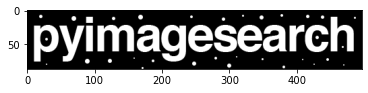

In [5]:
# load the image and convert it to grayscale
image = cv2.imread("logo_noise.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# show the original image
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Erosion 

It works by defining a structuring element and then sliding this structuring element from left-to-right and top-to-bottom across the input image. A foreground pixel in the input image will be kept only if ALL pixels inside the structuring element are > 0. Otherwise, the pixels are set to 0 (i.e. background). 

Useful for removing small blobs in an image or disconnecting two connected objects.

The second argument to cv2.erode  is the structuring element. 
If None , then a 3 \times 3 structuring element, identical to the 8-neighborhood structuring element we saw above will be used. Of course, you could supply your own custom structuring element here instead of None  as well. 

The last argument is the number of iterations.

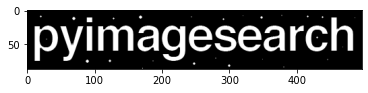

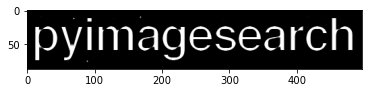

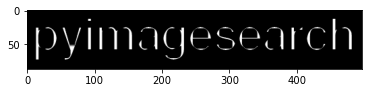

In [7]:
# apply a series of erosions
for i in range(0, 3):
	eroded = cv2.erode(image.copy(), None, iterations=i + 1)
	plt.imshow(eroded)
	plt.show()

# Dilation

The opposite of an erosion is a dilation. Just like an erosion will eat away at the foreground pixels, a dilation will grow the foreground pixels.

Useful for joining broken parts of an image together.

Dilations, just as an erosion, also utilize structuring elements — a center pixel p of the structuring element is set to white if ANY pixel in the structuring element is > 0.

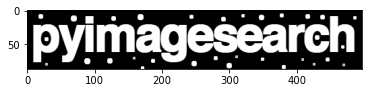

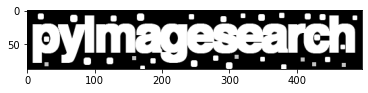

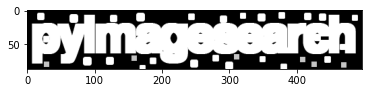

In [10]:
# apply a series of dilations
for i in range(0, 3):
	dilated = cv2.dilate(image.copy(), None, iterations=i + 1)
	plt.imshow(dilated)
	plt.show()

# Opening

An opening is an erosion followed by a dilation.

Useful to remove small blobs from an image: first an erosion is applied to remove the small blobs, then a dilation is applied to regrow the size of the original object.

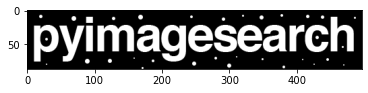

In [11]:
# close all windows to cleanup the screen and initialize the list
# of kernels sizes that will be applied to the image
plt.imshow(image)
kernelSizes = [ (5, 5), (7, 7), (9,9)]

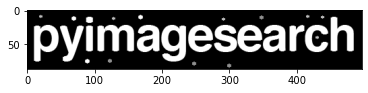

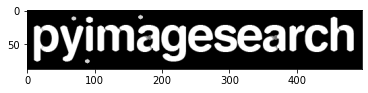

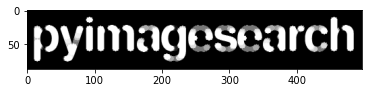

In [13]:
# loop over the kernels and apply an "opening" operation to the image
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernelSize) #MORPH_RECT  MORPH_CROSS  MORPH_ELLIPSE
	opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
	plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
	plt.show()

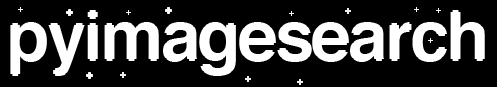

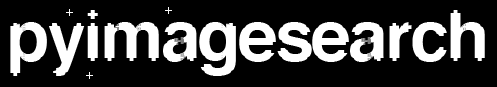

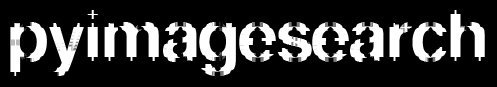

In [ ]:
# loop over the kernels and apply an "opening" operation to the image
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernelSize) #MORPH_RECT  MORPH_CROSS  MORPH_ELLIPSE
	opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
	plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
	plt.show()

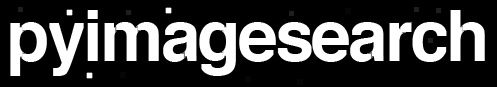

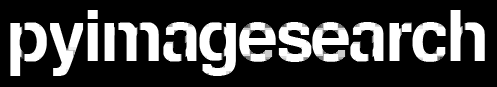

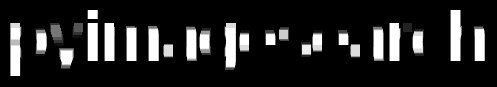

In [ ]:
# loop over the kernels and apply an "opening" operation to the image
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize) #MORPH_RECT  MORPH_CROSS  MORPH_ELLIPSE
	opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
	plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
	plt.show()

# Closing

A closing is a dilation followed by an erosion.

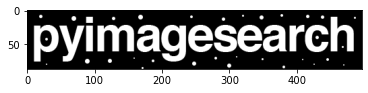

In [14]:
# close all windows to cleanup the screen and initialize the list
# of kernels sizes that will be applied to the image
plt.imshow(image)
kernelSizes = [ (5, 5), (7, 7), (9,9)]

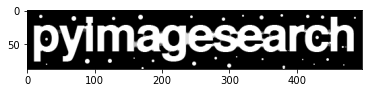

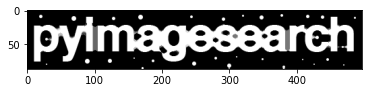

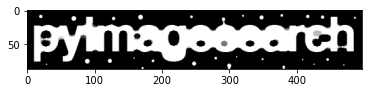

In [15]:
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernelSize)
	closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
	plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
	plt.show()

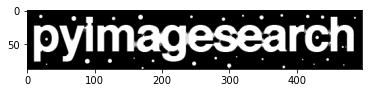

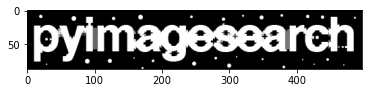

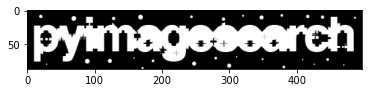

In [16]:
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernelSize)
	closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
	plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
	plt.show()

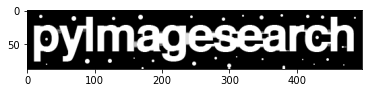

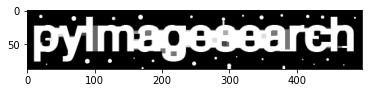

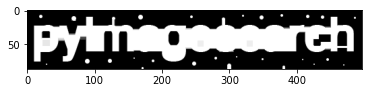

In [17]:
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
	plt.imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
	plt.show()

# Morphological Gradient

Its the substraction between dilation and erosion

Useful for determining the outline of a particular object of an image

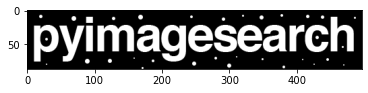

In [18]:
# close all windows to cleanup the screen and initialize the list
# of kernels sizes that will be applied to the image
plt.imshow(image)
kernelSizes = [ (5, 5), (7, 7), (9,9)]

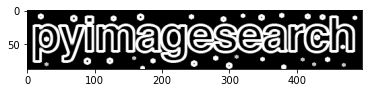

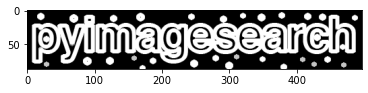

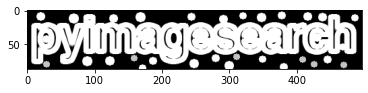

In [19]:
# loop over the kernels and apply a "morphological gradient" operation
# to the image
for kernelSize in kernelSizes:
	kernel   = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernelSize)
	gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
	plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))
	plt.show()

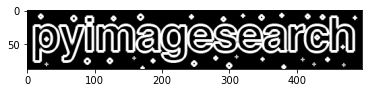

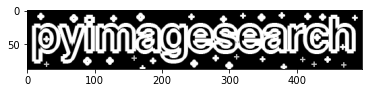

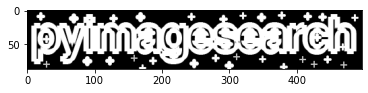

In [20]:
# loop over the kernels and apply a "morphological gradient" operation
# to the image
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kernelSize)
	gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
	plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))
	plt.show()

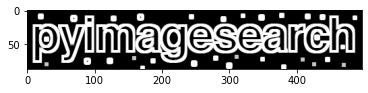

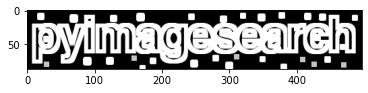

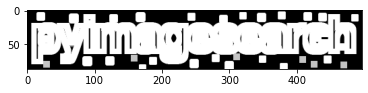

In [21]:
# loop over the kernels and apply a "morphological gradient" operation
# to the image
for kernelSize in kernelSizes:
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
	plt.imshow(cv2.cvtColor(gradient, cv2.COLOR_BGR2RGB))
	plt.show()

#Top Hat/White Hat
A top hat (also known as a white hat) is the substraccion between the original (grayscale/single channel) input image and the opening.

Useful to reveal bright regions of an image on dark backgrounds.

In [23]:
# load the image and convert it to grayscale
image = cv2.imread('morph_car.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

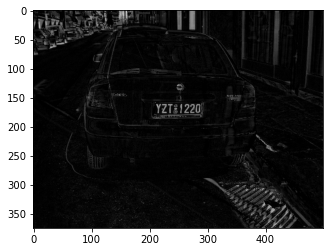

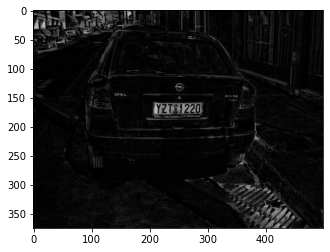

In [24]:
# construct a rectangular kernel 
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 5)) # (13,5)

# apply blackhat to find dark regions on a light background
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)

# apply tophat to find light regions on a dark background
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)

# show the output images
#cv2_imshow(image)
plt.imshow(cv2.cvtColor(blackhat, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(tophat, cv2.COLOR_BGR2RGB))
plt.show()